# Fake News Detection
This python project of detecting fake news deals with fake and real news. Using sklearn, we build a TfidfVectorizer on our dataset. Then, we initialize a PassiveAggressive Classifier and fit the model. In the end, the accuracy score and the confusion matrix tell us how well our model fares.


**TF (Term Frequency):** The number of times a word appears in a document is its Term Frequency. A higher value means a term appears more often than others, and so, the document is a good match when the term is part of the search terms.

**IDF (Inverse Document Frequency):** Words that occur many times a document, but also occur many times in many others, may be irrelevant. IDF is a measure of how significant a term is in the entire corpus.

**TfidfVectorizer:** converts a collection of raw documents into a matrix of TF-IDF features.

**PassiveAggressiveClassifier:** Passive Aggressive algorithms are online learning algorithms. Such an algorithm remains passive for a correct classification outcome, and turns aggressive in the event of a miscalculation, updating and adjusting. Unlike most other algorithms, it does not converge. Its purpose is to make updates that correct the loss, causing very little change in the norm of the weight vector.

## Import Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

## Load the data

In [2]:
df = pd.read_csv(r'C:\Users\Vivek\Machine Learning\Machine Learning Projects\Fake-News-Detection\news.csv')
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [18]:
for i in range(0, df.shape[0]-1):
    if (df.text.isnull()[i]):
        df.text[i]=df.title[i]
        
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [19]:
df.shape

(6335, 4)

In [20]:
labels = df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [34]:
import re 
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import stopwords
import string

In [35]:
print('Data Cleaning Started.....')

stop=set(stopwords.words('english'))
punc=list(string.punctuation)
stop.update(punc)

Data Cleaning Started.....


In [36]:
RE_EMOJI = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)

def remove_emoji(text):
    return RE_EMOJI.sub(r' ', text)

#def remove_htmltag(text):
 #   return RE_HTMLTAG.sub(r' ',text)

RE_BLANKLINE=re.compile(r'^(?:[\t ]*(?:\r?\n|\r))+')
def remove_blankline(text):
    return RE_BLANKLINE.sub(r' ',text)

RE_EMAIL=re.compile(r'[\w._%+-]{1-20}@[\w.-]{2,20}.[A-Za-z]{2-3}')
def remove_email(text):
    return RE_EMAIL.sub(r' ',text)

In [39]:
def remove_stopwords(text):
    filtered = []
    word_token = word_tokenize(text)
    
    for word in word_token:
        if word not in stop:
            filtered.append(word)
    text = ' '.join(filtered)
    return text


def clean_data(df,columns:list):
    for col in columns:
        df[col] = df[col].apply(lambda x:remove_emoji(x))
        #df[col] = df[col].apply(lambda x:remove_htmltag(x))
        df[col] = df[col].apply(lambda x:remove_blankline(x))
        df[col] = df[col].apply(lambda x:remove_email(x))
        df[col] = df[col].apply(lambda x:remove_stopwords(x))
    return df       

In [40]:
col = ['text']
clean_data(df, col)
print("Data Cleaning Completed")

Data Cleaning Completed


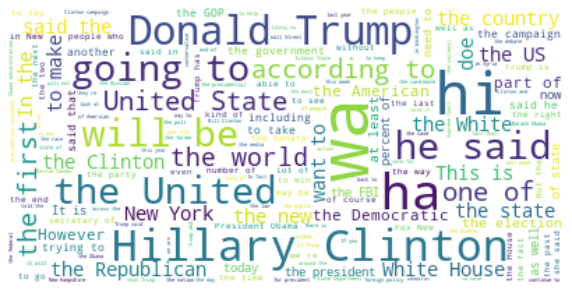

In [33]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
text = " ".join(i for i in df['text'])

wordcloud = WordCloud(max_font_size = 50, 
                     background_color = "white").generate(text)
plt.figure(figsize = [10,10])
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], labels, 
                                                    test_size=0.2, random_state=7)

## Initialize TfidfVectorizer

In [14]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

In [15]:
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

## Initialize PassiveAggressiveClassifier

In [22]:
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=50, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [28]:
y_pred = pac.predict(tfidf_test)

score = accuracy_score(y_test, y_pred)
print("Accuracy: {} %".format(round(score*100)))

Accuracy: 93.0 %


In [29]:
confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])

array([[587,  51],
       [ 40, 589]], dtype=int64)

So with this model, we have 589 true positives, 587 true negatives, 42 false positives, and 49 false negatives.